In [3]:
#import library
import numpy as np
import pandas as pd
import yfinance as yf #Stock Data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from transformers import pipeline
!pip install finnhub-python
import finnhub #Company News
import torch

pd.set_option('display.max_colwidth',180)

## Companies top 500

In [4]:
companies = pd.read_csv('S&P_500_companies.csv')
company_symbol = 'PPL'

companies.head(15)


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


## Stock Data

In [7]:
stock_data = yf.download(company_symbol,start='2023-1-1',end=datetime.today())
stock_data = stock_data.reset_index()
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,PPL,PPL,PPL,PPL,PPL,PPL
0,2023-01-03 00:00:00+00:00,27.399000,29.200001,29.420000,28.709999,29.309999,5784700
1,2023-01-04 00:00:00+00:00,28.083977,29.930000,30.230000,29.260000,29.350000,7792100
2,2023-01-05 00:00:00+00:00,27.436537,29.240000,29.860001,29.200001,29.719999,6309900
3,2023-01-06 00:00:00+00:00,28.112125,29.959999,29.990000,29.410000,29.570000,5201300
4,2023-01-09 00:00:00+00:00,28.309175,30.170000,30.420000,29.910000,29.910000,5623300


## Company News

In [8]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2020-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])
news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
news['datetime'] = pd.to_datetime(news['datetime'])


news.head()

,datetime,headline,related,source,summary
0,2023-12-29,PPL Corp. stock outperforms market despite losses on the day,PPL,MarketWatch,"Shares of PPL Corp. slid 0.18% to $27.10 Friday, on what proved to be an all-around poor trading session for the stock market, with the S&P 500 Index falling..."
1,2023-12-28,PPL Corp. stock underperforms Thursday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.41% higher to $27.15 Thursday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
2,2023-12-27,PPL Corp. stock underperforms Wednesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.22% higher to $27.04 Wednesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
3,2023-12-26,PPL Corp. stock underperforms Tuesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.60% higher to $26.98 Tuesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
4,2023-12-22,PPL Corp. stock outperforms market on strong trading day,PPL,MarketWatch,"Shares of PPL Corp. rallied 1.63% to $26.82 Friday, on what proved to be an all-around mixed trading session for the stock market, with the S&P 500 Index..."


In [9]:
import requests

url = f'https://eodhd.com/api/news?s=AAPL.US&offset=0&limit=10&api_token=demo&fmt=json'
data = requests.get(url).json()

print(data)

[{'date': '2024-11-04T14:01:00+00:00', 'title': 'Warren Buffett’s Berkshire Hathaway is selling Apple stock and sitting on more cash than ever', 'content': 'Warren Buffett’s Berkshire Hathaway (BRK.A) has continued to sell off considerable stakes in several companies as it grows its cash pile to a record $325.2 billion.\n\nIn the third quarter, Berkshire sold $36.1 billion of stock overall, including from major holdings Apple (AAPL) and Bank of America (BAC), the company disclosed in regulatory filings Saturday. Meanwhile, it purchased just $1.5 billion of stock in that same period.\n\nBerkshire also added $48.3 billion to its cash hoard in the quarter, including by freezing stock buybacks — meaning it didn’t repurchase any shares of its own company.\n\n“Berkshire is a microcosm of the broader economy,” Cathy Seifert, an analyst at CFRA Research, told Reuters. “Its hoarding cash suggests a ‘risk off’ mindset, and investors may worry what it means for the economy and markets.”\n\nOther 

In [10]:
news.head()
news['datetime'].nunique()


30

In [11]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2023-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])
news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
news['datetime'] = pd.to_datetime(news['datetime'])

news.head()

,datetime,headline,related,source,summary
0,2023-12-29,PPL Corp. stock outperforms market despite losses on the day,PPL,MarketWatch,"Shares of PPL Corp. slid 0.18% to $27.10 Friday, on what proved to be an all-around poor trading session for the stock market, with the S&P 500 Index falling..."
1,2023-12-28,PPL Corp. stock underperforms Thursday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.41% higher to $27.15 Thursday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
2,2023-12-27,PPL Corp. stock underperforms Wednesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.22% higher to $27.04 Wednesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
3,2023-12-26,PPL Corp. stock underperforms Tuesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.60% higher to $26.98 Tuesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
4,2023-12-22,PPL Corp. stock outperforms market on strong trading day,PPL,MarketWatch,"Shares of PPL Corp. rallied 1.63% to $26.82 Friday, on what proved to be an all-around mixed trading session for the stock market, with the S&P 500 Index..."


In [25]:
def get_news_count(company_symbol, start_date="2023-01-01", end_date="2024-01-01"):
    # check the number of news articles available for a given company
    news = finnhub_client.company_news(company_symbol, _from=start_date, to=end_date)
    return len(news)

In [28]:
def select_companies_with_enough_news(companies, start_date="2023-01-01", end_date="2024-01-01", threshold=50):
    # randomly select 20 companies, then filter them based on whether they have enough news
    # select 20 random companies
    random_companies = companies.sample(20)

    # filter companies with sufficient news
    selected_companies = []
    for index, row in random_companies.iterrows():
        symbol = row['Symbol']
        news_count = get_news_count(symbol, start_date, end_date)
        if news_count >= threshold:
            selected_companies.append(symbol)

    return selected_companies

# get the list of companies with sufficient news
selected_companies = select_companies_with_enough_news(companies)
print("Selected Companies:", selected_companies)

Selected Companies: ['GD', 'PPL', 'AME', 'RJF', 'LLY', 'ELV', 'VRTX', 'CB', 'SNPS', 'WDC', 'ROST', 'HD', 'HWM', 'RSG']


In [31]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")

def get_news(company_symbol, start_date='2023-01-01', end_date='2024-01-01'):
    """
    fetch company news data and add sentiment analysis
    """
    news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from=start_date, to=end_date)).drop(
        columns=['id', 'image', 'category', 'url'])

    news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
    news['datetime'] = pd.to_datetime(news['datetime'])

    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

    # Add sentiment analysis for each headline
    news['truncated_headline'] = news['headline'].apply(lambda x: truncate_sequence(x))
    news['headline_sentiment'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
    news['headline_sentiment_score'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['score'])
    news['sentiment_binary'] = news['headline_sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

    return news[['datetime', 'source', 'headline', 'headline_sentiment', 'headline_sentiment_score', 'sentiment_binary']]

def truncate_sequence(text):
    return text if len(text) <= 512 else text[:512]

if selected_companies:
    company_symbol = selected_companies[0]
    news_data = get_news(company_symbol)
    print(news_data.head())
else:
    print("No companies with sufficient news found.")

    datetime        source  \
0 2024-01-01  SeekingAlpha   
1 2023-12-31  SeekingAlpha   
2 2023-12-29         Yahoo   
3 2023-12-29   MarketWatch   
4 2023-12-28         Yahoo   

                                                                      headline  \
0                                   6 Top Long-Term Stocks On My 2024 Wishlist   
1                                          Lockheed Martin: Opportunity Knocks   
2  General Dynamics Insiders Sell US$12m Of Stock, Possibly Signalling Caution   
3   General Dynamics Corp. stock outperforms competitors on strong trading day   
4                            Stocks, sectors that reached record highs in 2023   

  headline_sentiment  headline_sentiment_score  sentiment_binary  
0           POSITIVE                  0.995383                 1  
1           POSITIVE                  0.802311                 1  
2           NEGATIVE                  0.997198                 0  
3           POSITIVE                  0.988854            

In [13]:
# Creating a dataframe with the overall sentiment score for each day

news_data = get_news(company_symbol)
average_sentiment = news_data.groupby('datetime').agg({
    'sentiment_binary': 'mean'
}).reset_index()

average_sentiment.rename(columns={'sentiment_binary': 'average_daily_sentiment'}, inplace=True)

average_sentiment['datetime'] = pd.to_datetime(average_sentiment['datetime'])
average_sentiment.set_index('datetime', inplace=True)
average_sentiment.head()

,average_daily_sentiment
datetime,
2023-11-12,0.0
2023-11-13,1.0
2023-11-15,1.0
2023-11-16,0.0
2023-11-17,0.0


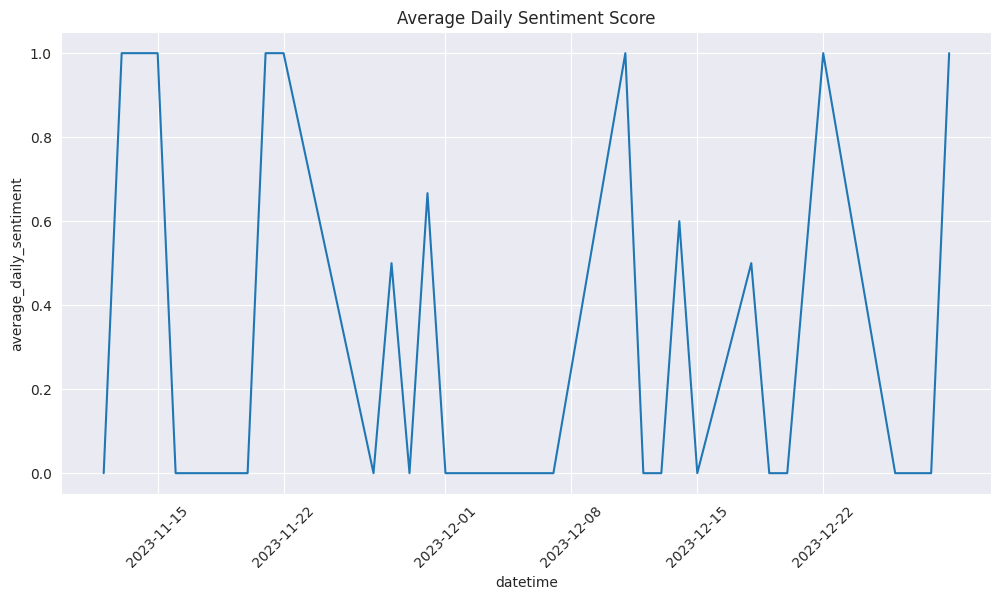

In [14]:
# Plotting the average sentiment score for each day
plt.figure(figsize=(12,6))
sns.lineplot(x='datetime',y='average_daily_sentiment',data=average_sentiment)
plt.title('Average Daily Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# loop through each company in selected_companies and print the average sentiment score
for company_symbol in selected_companies:
    # get the news data for the current company
    news_data = get_news(company_symbol)

    # calculate the average daily sentiment for each date
    average_sentiment = news_data.groupby('datetime').agg({
        'sentiment_binary': 'mean'
    }).reset_index()

    average_sentiment.rename(columns={'sentiment_binary': 'average_daily_sentiment'}, inplace=True)
    average_sentiment['datetime'] = pd.to_datetime(average_sentiment['datetime'])
    average_sentiment.set_index('datetime', inplace=True)

    # print the average daily sentiment score for the company
    print(f"\nAverage Daily Sentiment Score for {company_symbol}:")
    print(average_sentiment)



Average Daily Sentiment Score for GD:
            average_daily_sentiment
datetime                           
2023-11-11                 0.000000
2023-11-13                 0.333333
2023-11-14                 0.666667
2023-11-15                 0.666667
2023-11-16                 0.750000
2023-11-17                 0.000000
2023-11-20                 0.800000
2023-11-21                 0.500000
2023-11-22                 0.500000
2023-11-24                 0.500000
2023-11-26                 0.500000
2023-11-27                 0.333333
2023-11-28                 0.555556
2023-11-29                 0.500000
2023-11-30                 0.333333
2023-12-01                 0.333333
2023-12-02                 1.000000
2023-12-04                 0.333333
2023-12-05                 0.600000
2023-12-06                 0.250000
2023-12-07                 1.000000
2023-12-08                 0.666667
2023-12-09                 0.500000
2023-12-10                 1.000000
2023-12-12               

In [15]:
# Testing stock data

stock = yf.Ticker(company_symbol)
stock_info = stock.info

print("Stock Name:", stock_info['shortName'])
print("Previous Close:", stock_info['regularMarketPreviousClose'])

# Fetching the stock's current price
current_price = stock_info.get('regularMarketPrice', 'Data not available')
if (current_price == 'Data not available'):
    current_price = stock_info.get('regularMarketPreviousClose', 'Data not available')
    print("Current Price:", current_price)

Stock Name: PPL Corporation
Previous Close: 31.56
Current Price: 31.56


In [16]:
# Testing stock data and finding close prices
def get_stock_data(stock_symbol, start_date='2023-03-07', end_date=datetime.today().date() - timedelta(days=1)):
    stock = yf.Ticker(stock_symbol)
    stock_info = stock.history(start=start_date, end=end_date)

    stock_df = pd.DataFrame({
        'datetime': stock_info.index.date,
        'previous_close': stock_info['Close']
    })

    stock_df['datetime'] = pd.to_datetime(stock_df['datetime'])
    stock_df.set_index('datetime', inplace=True)
    return stock_df


stock_data = get_stock_data(company_symbol)
stock_data.head()

,previous_close
datetime,
2023-03-07,25.222094
2023-03-08,25.334696
2023-03-09,25.164282
2023-03-10,24.851860
2023-03-13,25.334696


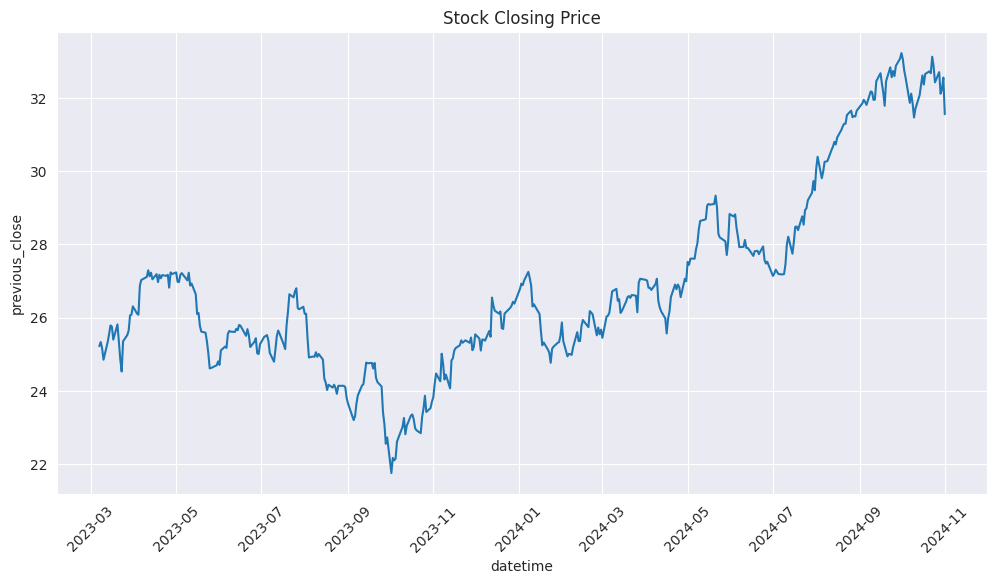

In [17]:
# Plotting the stock's closing price
plt.figure(figsize=(12,6))
sns.lineplot(x=stock_data.index,y='previous_close',data=stock_data)
plt.title('Stock Closing Price')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Find the subset of stock prices that correlate with the sentiment data
stock_data.index = stock_data.index.normalize()
average_sentiment.index = average_sentiment.index.normalize()

# Merge the DataFrames only if both DataFrames have matching 'datetime' values
result = pd.merge(stock_data[['previous_close']], average_sentiment[['average_daily_sentiment']],
                  left_index=True, right_index=True, how='inner')

print("Merged Data:")
print(result.head())


Merged Data:
            previous_close  average_daily_sentiment
datetime                                           
2023-11-13       24.069702                      1.0
2023-11-15       24.889708                      1.0
2023-11-16       25.101948                      0.0
2023-11-17       25.169477                      0.0
2023-11-20       25.246656                      0.0


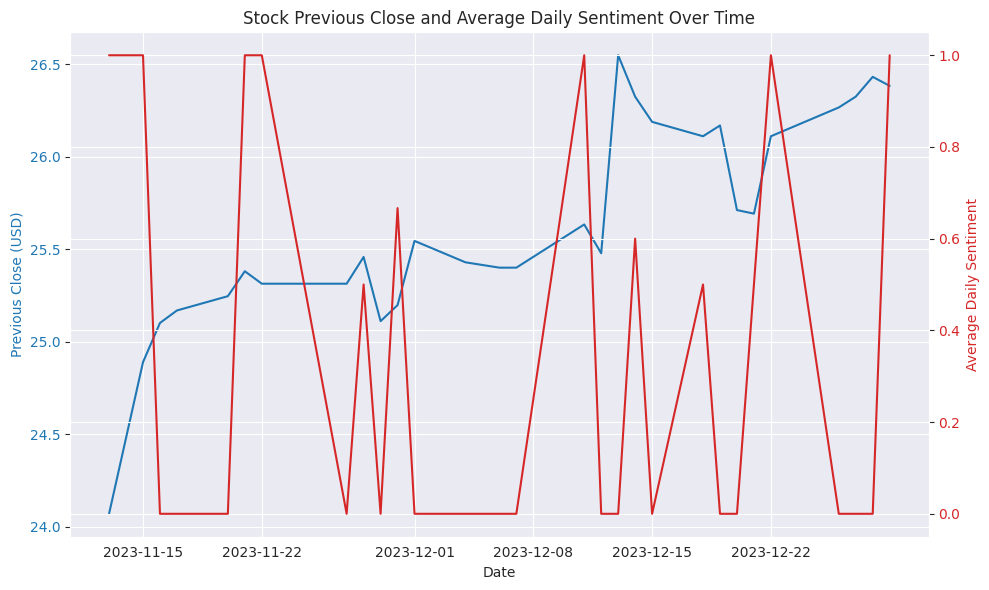

In [19]:
# Create a figure and axis objects to find the correlation between the stock's closing price and the average sentiment score
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Previous Close (USD)', color='tab:blue')
ax1.plot(result.index, result['previous_close'], color='tab:blue', label='Previous Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Daily Sentiment', color='tab:red')
ax2.plot(result.index, result['average_daily_sentiment'], color='tab:red', label='Average Daily Sentiment')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title('Stock Previous Close and Average Daily Sentiment Over Time')
fig.tight_layout()
plt.show()



In [20]:
# Use an SVM to predict the stock's closing price based on the sentiment data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [21]:
# movement: up is 1, down is 0
result['next_close'] = result['previous_close'].shift(-1)
result['movement'] = (result['next_close'] > result['previous_close']).astype(int)
result.dropna(inplace=True)

# Define the features and target variable
X = result[['average_daily_sentiment', 'previous_close']]
y = result['movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in y_train and y_test
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())






Training set class distribution:
movement
1    13
0     9
Name: count, dtype: int64

Testing set class distribution:
movement
1    3
0    3
Name: count, dtype: int64


In [22]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



In [23]:
new_data = pd.DataFrame({'average_daily_sentiment': [0.3], 'previous_close': [105]})
new_prediction = svm_model.predict(new_data)
print("Predicted Movement:", "Up" if new_prediction[0] == 1 else "Down")

Predicted Movement: Down


In [24]:
# Make a dataframe with the date and the predicted movement
predictions_df = pd.DataFrame({'Date': X_test.index, 'Predicted Movement': y_pred})
predictions_df['Predicted Movement'] = predictions_df['Predicted Movement'].map({1: 'Up', 0: 'Down'})
predictions_df.set_index('Date', inplace=True)
print(predictions_df.head())

           Predicted Movement
Date                         
2023-11-30                 Up
2023-12-13               Down
2023-12-27               Down
2023-12-01                 Up
2023-11-16                 Up
